In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 1000;u = [0, 0, 0];a = [1, 3, 0]
x1 = np.random.normal(u[0], a[0], N)  # mean=0, std=1
x2 = x1 + np.random.normal(u[1], a[1], N)
x3 = 2 * x1 + x2
data = np.column_stack((x1, x2, x3))

# Perform PCA
cov_matrix = np.cov(data, rowvar=False)
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(cov_matrix)

U, S, Vt = np.linalg.svd(data)
eigenvalues_svd = S**2 / (N - 1)
eigenvectors_svd = Vt.T

print(eigenvalues_cov)
print(eigenvalues_svd)
print("Are eigenvalues the same?", np.allclose(eigenvalues_cov, eigenvalues_svd))
print(eigenvectors_cov)   
print(eigenvectors_svd)
print("Are eigenvectors the same?", np.allclose(eigenvectors_cov, eigenvectors_svd))
# Both false but if we look carefully to vectors we will see first colums exactly same, second and third columns places exchanged

[ 2.54913514e+01 -1.08597603e-15  2.01759743e+00]
[2.56175500e+01 2.01882300e+00 9.13737538e-31]
Are eigenvalues the same? False
[[-0.11044427 -0.81649658  0.56668809]
 [-0.58360407 -0.40824829 -0.70195415]
 [-0.80449261  0.40824829  0.43142204]]
[[-0.11014482 -0.56674637 -0.81649658]
 [-0.58397489  0.70164568 -0.40824829]
 [-0.80426453 -0.43184707  0.40824829]]
Are eigenvectors the same? False


In [2]:
explained_variance_ratio = eigenvalues_cov / np.sum(eigenvalues_cov)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
total_variance_explained = np.sum(explained_variance_ratio[:2])

print(explained_variance_ratio)
print(cumulative_explained_variance_ratio)
print("The principal components explain {}% of the total variance.".format(total_variance_explained * 100))

# Since the third variable of the data set is already obtained by the combination of the other two variables, the variance of the third 
# principal component is explained by the combination of the other two. Therefore, the eigenvalue of the third principal component is generally 
# very small compared to the others and is insignificant in terms of the total variance.

[ 9.26656687e-01 -3.94771911e-17  7.33433126e-02]
[0.92665669 0.92665669 1.        ]
The principal components explain 92.6656687361987% of the total variance.


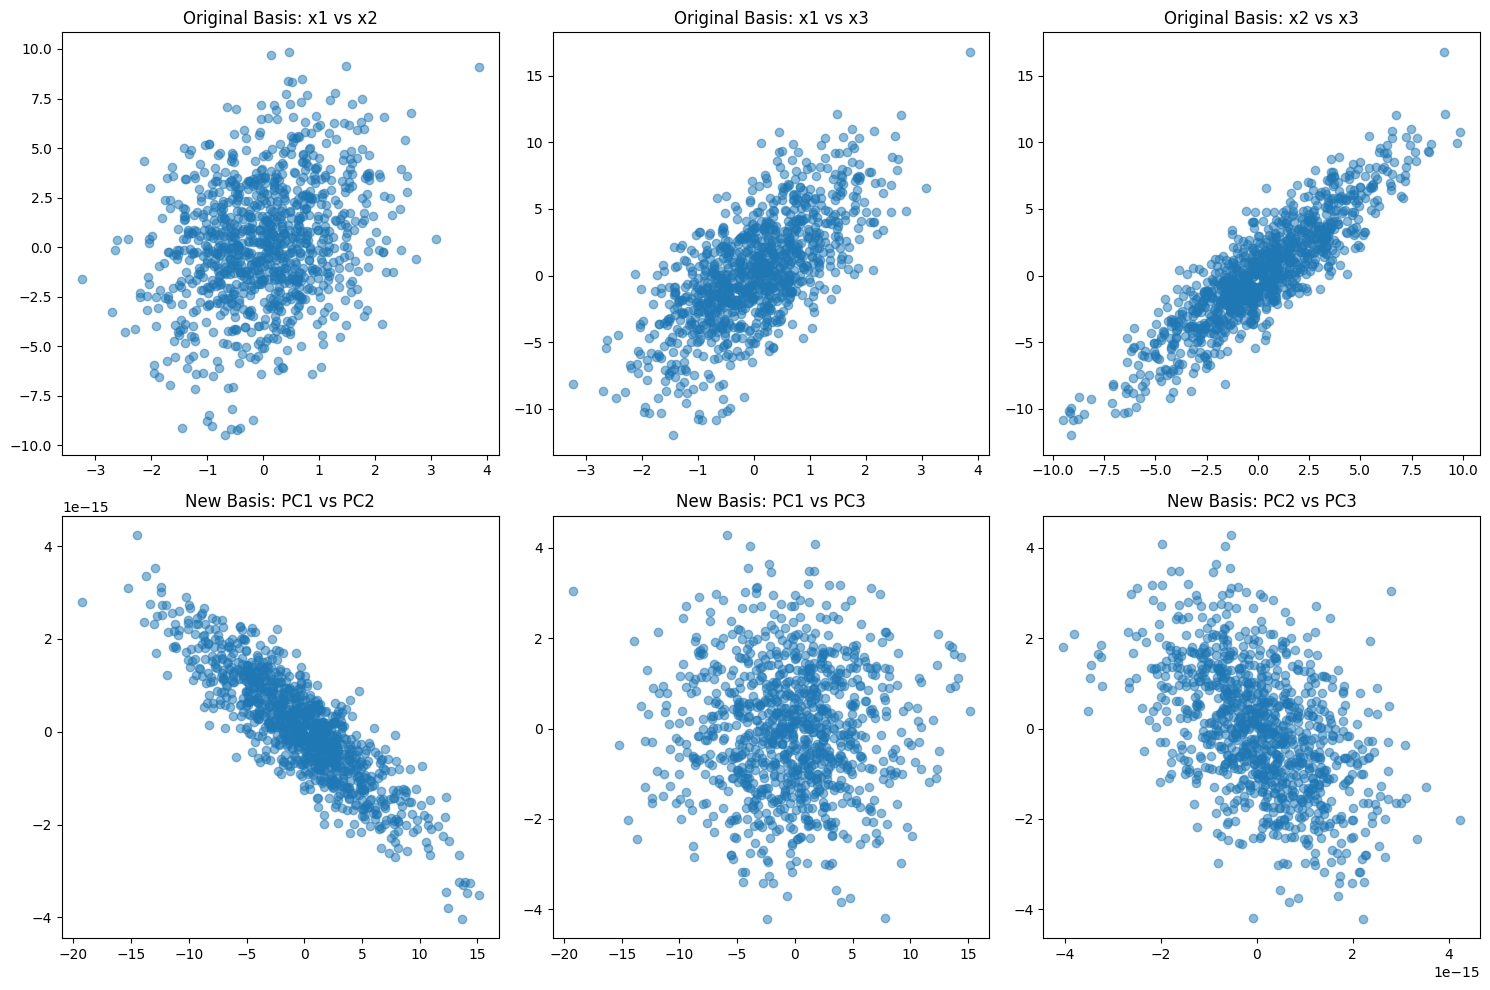

In [3]:
# Reduce dimensionality
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.99) + 1
projection_matrix = eigenvectors_cov[:, :num_components]
reduced_data = np.dot(data, projection_matrix)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# Original basis
axs[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.5)
axs[0, 0].set_title('Original Basis: x1 vs x2')
axs[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.5)
axs[0, 1].set_title('Original Basis: x1 vs x3')
axs[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.5)
axs[0, 2].set_title('Original Basis: x2 vs x3')
# New basis
axs[1, 0].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
axs[1, 0].set_title('New Basis: PC1 vs PC2')
axs[1, 1].scatter(reduced_data[:, 0], reduced_data[:, 2], alpha=0.5)
axs[1, 1].set_title('New Basis: PC1 vs PC3')
axs[1, 2].scatter(reduced_data[:, 1], reduced_data[:, 2], alpha=0.5)
axs[1, 2].set_title('New Basis: PC2 vs PC3')
plt.tight_layout();plt.show()


In [4]:
num_noise_features = 3
noise = np.random.normal(0, 0.05, size=(N, num_noise_features))
data_with_noise = np.hstack((data, noise))

In [5]:
# Perform PCA on data with noise
cov_matrix_noise = np.cov(data_with_noise, rowvar=False)
eigenvalues_cov_noise, eigenvectors_cov_noise = np.linalg.eig(cov_matrix_noise)

U_noise, S_noise, Vt_noise = np.linalg.svd(data_with_noise)
eigenvalues_svd_noise = S_noise**2 / (N - 1)
eigenvectors_svd_noise = Vt_noise.T

print(eigenvalues_cov_noise);print(eigenvalues_svd_noise);print("\n")
print(eigenvectors_cov_noise);print("\n");print(eigenvectors_svd_noise)


[2.54913624e+01 2.01759929e+00 7.02389756e-16 2.41947695e-03
 2.56853910e-03 2.50059784e-03]
[2.56175623e+01 2.01882490e+00 2.57606687e-03 2.50233969e-03
 2.43194123e-03 2.97716672e-31]


[[-1.10444253e-01 -5.66687821e-01 -8.16496581e-01  3.39580697e-04
  -3.96320800e-04 -2.04828966e-04]
 [-5.83603933e-01  7.01953891e-01 -4.08248290e-01 -1.36440539e-04
   3.59210332e-04  6.08355506e-04]
 [-8.04492439e-01 -4.31421750e-01  4.08248290e-01  5.42720854e-04
  -4.33431268e-04  1.98697575e-04]
 [-1.28980495e-04 -7.69225097e-04  9.60016236e-16 -8.62811976e-01
   1.46493162e-01  4.83833276e-01]
 [ 1.80989146e-04 -5.50701476e-04 -1.41001684e-16  3.62873338e-01
   8.45834707e-01  3.91006717e-01]
 [ 6.18048566e-04  1.66185186e-04 -2.61747855e-16  3.51963075e-01
  -5.12935598e-01  7.82955080e-01]]


[[-1.10144796e-01 -5.66746099e-01  4.06081418e-04 -1.74051289e-04
  -3.48481152e-04 -8.16496581e-01]
 [-5.83974751e-01  7.01645386e-01 -4.37335643e-04  6.06695143e-04
   1.28592122e-04 -4.08248290e-01]
 

In [6]:
explained_variance_ratio_noise = eigenvalues_cov_noise / np.sum(eigenvalues_cov_noise)
cumulative_explained_variance_ratio_noise = np.cumsum(explained_variance_ratio_noise)
total_variance_explained_noise = np.sum(explained_variance_ratio_noise[:2])

print(explained_variance_ratio_noise)
print(cumulative_explained_variance_ratio_noise)
print("The principal components explain {}% of the total variance.".format(total_variance_explained_noise * 100))
# Since the PCA result has a variance of more than 99 percent, there is no need for dimensionality reduction because you preserve most of the 
# underlying variability of the data set. In this case, trying to reduce the size of the dataset even further means that it may not adequately 
# preserve the essential features of the dataset.

[9.26404464e-01 7.33233855e-02 2.55261761e-17 8.79283820e-05
 9.33455834e-05 9.08764692e-05]
[0.92640446 0.99972785 0.99972785 0.99981578 0.99990912 1.        ]
The principal components explain 99.97278495654398% of the total variance.
